In [97]:
from MHP import MHP
import numpy as np
import pandas as pd
import os
import datetime
from matplotlib import pyplot as plt

In [98]:
DATA_DIR = '.\data\enhanced'
hairdryer = 'hair_dryer_finished.csv'
microwave = 'microwave_finished.csv'
pacifier = 'pacifier_finished.csv'

In [99]:
pdata = pd.read_csv(os.path.join(DATA_DIR, pacifier))
hdata = pd.read_csv(os.path.join(DATA_DIR, hairdryer))
mdata = pd.read_csv(os.path.join(DATA_DIR, microwave))

pdata = pdata.dropna(axis=0,how='any').drop(pdata.tail(1).index)
pdata.review_date = pd.to_datetime(pdata.review_date, format='%m/%d/%Y')
hdata = hdata.dropna(axis=0,how='any')
hdata.review_date = pd.to_datetime(hdata.review_date, format='%m/%d/%Y')
mdata = mdata.dropna(axis=0,how='any')
mdata.review_date = pd.to_datetime(mdata.review_date, format='%m/%d/%Y')

In [100]:
pdata.sort_values('review_date', inplace=True)
hdata.sort_values('review_date', inplace=True)
mdata.sort_values('review_date', inplace=True)

In [28]:
def HP(dataset, name):
    product = dataset.product_title.value_counts().index[0]
    subset = dataset[dataset.product_title==product]
    subset['relative'] = [(x - subset.iloc[0]['review_date']).days for x in subset['review_date']]
    data = subset[['relative', 'like']]
    data = data[data['like']!=0]
    data = np.array(data)
    data[:,1] = (data[:,1]+1)/2
    n = data.shape[0]
    P = MHP()
    w = 0.1
    P.data = data
    bestll = 10000000
    #while w<5:
    mhat = np.random.uniform(0,1, size=2)
    ahat = np.random.uniform(0,1, size=(2,2))
    ahat, mhat, ll = P.EM(ahat, mhat, w, epsilon=0.001, verbose=False)
        #print(w, ll)
    if ll<bestll:
        alpha, mu, omega = ahat, mhat, w
        bestll = ll
    w=w*1.2
    print(omega, bestll)
    Q = MHP(alpha, mu, omega)
    Q.data = data
    Q.plot_rates2()
    print(alpha, mu, omega)
    print(name, product)
    horizon = np.amax(Q.data[:,0])
    xs = np.linspace(0, horizon, horizon*10)
    rate1 = [Q.get_rate(ct, 0) for ct in xs]
    rate2 = [Q.get_rate(ct, 1) for ct in xs]
    return rate1, rate2, xs

D:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Max eigenvalue: 0.50000
0.1 -1.9374070346037242
Max eigenvalue: 0.77563
[[1.92534815e-20 1.72329461e-02]
 [4.85088435e-01 7.64851998e-01]] [0.0020994  0.06195672] 0.1
hair_dryer remington ac2015 t|studio salon collection pearl ceramic hair dryer, deep purple


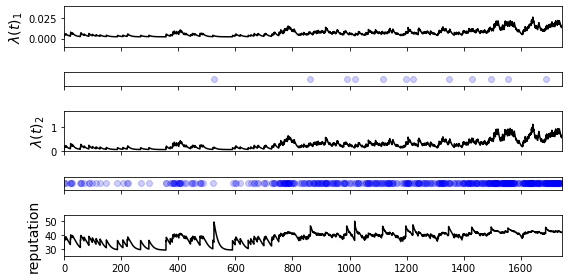

In [29]:
hrate1,hrate2,hxs = HP(hdata, 'hair_dryer')
plt.savefig('hair_dryer remington ac2015 t.jpg')
#plt.figure()
#plt.plot(hxs, np.array(hrate2)/np.array(hrate1), 'k-')
#plt.savefig('hair_dryer rep.jpg')

D:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Max eigenvalue: 0.50000
0.1 -2.0298942935161133
Max eigenvalue: 0.91672
[[0.21090499 0.19211539]
 [0.57857985 0.75923572]] [0.00659945 0.01317084] 0.1
microwave danby 0.7 cu.ft. countertop microwave


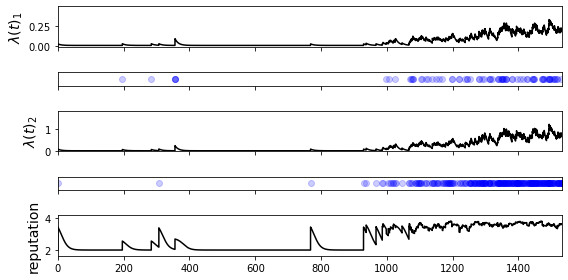

In [30]:
mrate1,mrate2,mxs=HP(mdata, 'microwave')
plt.savefig('microwave danby 0.7 cu.ft..jpg')

D:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Max eigenvalue: 0.50000
0.1 -1.6504375027942475
Max eigenvalue: 0.86336
[[0.05276828 0.08498601]
 [0.3631154  0.82529212]] [0.01805613 0.05198316] 0.1
pacifier philips avent bpa free soothie pacifier, 0-3 months, 2 pack, packaging may vary


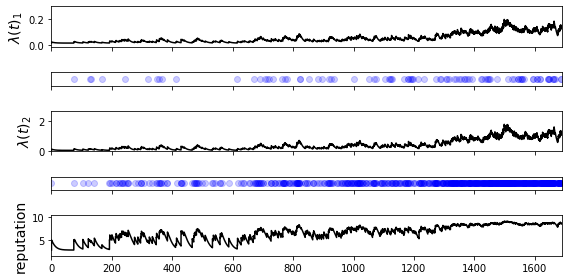

In [31]:
prate1,prate2,pxs=HP(pdata, 'pacifier')
plt.savefig('pacifier philips avent bpa free soothie pacifier.jpg')

In [32]:
reputation = pd.dataframe()
reputation['time']
reputation['pacifier_l1']
reputation['pacifier_l2']
reputation['pacifier_rep']
reputation['microwave_l1']
reputation['microwave_l2']
reputation['microwave_rep']
reputation['hair_dryer_l1']
reputation['hair_dryer_l2']
reputation['hair_dryer_rep']

AttributeError: module 'pandas' has no attribute 'dataframe'

In [33]:
pxs

array([0.00000000e+00, 1.00005921e-01, 2.00011842e-01, ...,
       1.68879999e+03, 1.68889999e+03, 1.68900000e+03])

In [46]:
def enlarge(dataset, alpha, mu, omega=0.1):
    product = dataset.product_title.value_counts().index[0]
    subset = dataset[dataset.product_title==product]
    subset['relative'] = [(x - subset.iloc[0]['review_date']).days for x in subset['review_date']]
    data = subset[['relative', 'like']]
    data = data[data['like']!=0]
    data = np.array(data)
    data[:,1] = (data[:,1]+1)/2
    
    n = data.shape[0]
    P = MHP(alpha, mu, omega)
    P.data = data
    
    rate0 = np.array([P.get_rate(ct, 0) for ct in subset.relative])
    rate1 = np.array([P.get_rate(ct, 1) for ct in subset.relative])
    rep = rate1/rate0
    
    subset['rate0']=rate0
    subset['rate1']=rate1
    subset['reputation']=rep
    return subset

In [53]:
hdata.review_date

8929    2002-03-02
7945    2002-04-20
7721    2002-07-13
8975    2002-08-13
7306    2002-08-21
           ...    
20      2015-08-31
393     2015-08-31
1697    2015-08-31
11091   2015-08-31
3574    2015-08-31
Name: review_date, Length: 11461, dtype: datetime64[ns]

In [59]:
cdata = pd.read_csv('cdata.csv')
hsub = enlarge(hdata, alpha, mu)

D:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Max eigenvalue: 0.77563


D:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_g

In [81]:
def avg(dataset, alpha, mu, omega=0.1):
    product = dataset.product_title.value_counts().index[0]
    subset = dataset[dataset.product_title==product]
    subset['relative'] = [(x - subset.iloc[0]['review_date']).days for x in subset['review_date']]
    data = subset[['relative', 'like']]
    data = data[data['like']!=0]
    data = np.array(data)
    data[:,1] = (data[:,1]+1)/2
    
    n = data.shape[0]
    P = MHP(alpha, mu, omega)
    P.data = data
    
    i=0
    while i<max(subset.relative): 
        quater = [P.get_rate(j,1)/P.get_rate(j, 0) for j in range(i,i+90)]
        print(np.mean(quater))
        i+=90


In [82]:
avg(hdata, alpha, mu)

D:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Max eigenvalue: 0.77563
36.148231277520864
34.0459670611781
32.856263725405405
31.496585113328088
37.953084542204046
36.406057367366074
32.86650700601627
35.3641676795932
39.409857825666215
39.778317974805844
39.961239548729836
40.6036710897851
40.65502102300589
40.72100175634325
39.95021549868275
40.749499143350924
41.80200513806592
41.904021151778274
42.356617188057
37.797973049417934


datetime.date(i.year,i.month,1)

In [72]:
datetime.date(i.year,i.month,1)

TypeError: 'getset_descriptor' object is not callable

In [101]:
def HP(dataset, name):
    product = dataset.product_title.value_counts().index[0]
    subset = dataset[dataset.product_parent==544821753]
    subset['relative'] = [(x - subset.iloc[0]['review_date']).days for x in subset['review_date']]
    data = subset[['relative', 'like']]
    data = data[data['like']!=0]
    data = np.array(data)
    data[:,1] = (data[:,1]+1)/2
    n = data.shape[0]
    P = MHP()
    w = 0.1
    P.data = data
    bestll = 10000000
    #while w<5:
    mhat = np.random.uniform(0,1, size=2)
    ahat = np.random.uniform(0,1, size=(2,2))
    ahat, mhat, ll = P.EM(ahat, mhat, w, epsilon=0.001, verbose=False)
        #print(w, ll)
    if ll<bestll:
        alpha, mu, omega = ahat, mhat, w
        bestll = ll
    w=w*1.2
    print(omega, bestll)
    Q = MHP(alpha, mu, omega)
    Q.data = data
    Q.plot_rates2()
    print(alpha, mu, omega)
    print(name, product)
    horizon = np.amax(Q.data[:,0])
    xs = np.linspace(0, horizon, horizon*10)
    rate1 = [Q.get_rate(ct, 0) for ct in xs]
    rate2 = [Q.get_rate(ct, 1) for ct in xs]
    plt.savefig('microwave samsung smh1816s 1.8 cu.ft..jpg')
    return rate1, rate2, xs

D:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Max eigenvalue: 0.50000
0.1 -3.419825743801781
Max eigenvalue: 0.08395
[[0.01620489 0.00349349]
 [0.06398156 0.0806538 ]] [0.04507355 0.01346752] 0.1
microwave danby 0.7 cu.ft. countertop microwave


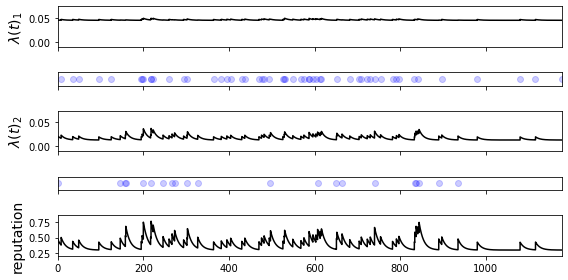

In [102]:
m1,m2,mss = HP(mdata, 'microwave')

In [103]:
plt.savefig('microwave samsung smh1816s 1.8 cu.ft.jpg')

<Figure size 432x288 with 0 Axes>